In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/plotting.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


Figure 4

In [3]:
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                      index_col=0)

In [4]:
shape(classII)

(5942, 1018)

In [5]:
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                        index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 2].index)
print len(thresholded_mutations)
classII_thresh = classII[thresholded_mutations]

515


In [6]:
mutations_thresh = mutations[thresholded_mutations]

In [7]:
yes_mutation, no_mutation = [], []
for mutation in thresholded_mutations:
    yes_mutation.extend(list(classII_thresh[mutations_thresh[mutation].astype(bool)][mutation]))
    no_mutation.extend(list(classII_thresh[~mutations_thresh[mutation].astype(bool)][mutation]))

In [8]:
split_df = pd.DataFrame({'Status': ['Mutation' for x in yes_mutation] + 
                                 ['No Mutation' for x in no_mutation],
                         'PHBR-II': yes_mutation + no_mutation})

In [9]:
len(split_df)

3060130

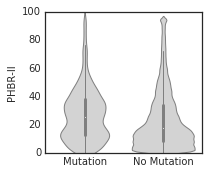

In [10]:
# Panel A
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Status', y='PHBR-II', data=split_df, color='lightgrey')
plt.ylim(0, 100)
plt.xlabel('')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/PHBR-II.mutation_split.conservative.pdf')

In [ ]:
# Panel B - point to script to run it

In [ ]:
# Panel C

In [10]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/conservative.thresh_2.txt',
           sep=',')
outfile = '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/cancer.conservative.classII_OR.pdf'

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


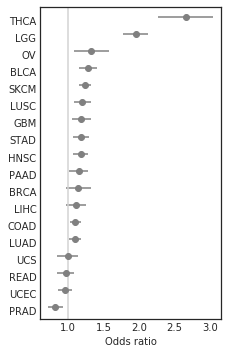

In [11]:
df['Error'] = df['OR'] - df['Lci']
ordered_tissues = df.OR.sort_values(ascending=False).index
df = df.ix[ordered_tissues]
plt.figure(figsize=(3.25, 5.75))
plt.axvline(1, color='lightgrey')
plt.errorbar(df.OR, [x + 0.2 for x in range(len(df))[::-1]], 
             xerr=list(df.Error), fmt='o', 
             color='grey', label='Class I')
plt.yticks(range(len(df))[::-1], list(df.index))
plt.ylim(-0.5, len(df)-0.2)
plt.xlabel('Odds ratio')
if outfile != None:
    plt.savefig(outfile, bbox_inches='tight')

Figure 5

In [17]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                     index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                      index_col=0)
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                        index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 2].index)
print len(thresholded_mutations)
classI_thresh = classI[thresholded_mutations]
classII_thresh = classII[thresholded_mutations]
df = pd.DataFrame({'MHC-I': pd.Series(np.matrix(classI_thresh).flatten().tolist()[0]),
                   'MHC-II': pd.Series(np.matrix(classII_thresh).flatten().tolist()[0])})
df['log(PHBR-I)'] = np.log10(df['MHC-I'])
df['log(PHBR-II)'] = np.log10(df['MHC-II'])

515


In [12]:
float(mutations.shape[0]*mutations.shape[1]) / mutations.sum().sum()

1097.2167603845455

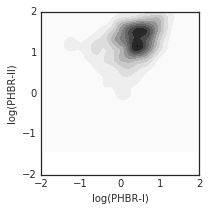

In [18]:
# Panel A
plt.figure(figsize=(3,3))

sample = df.sample(1000).index
g = sns.kdeplot(df.ix[sample]['log(PHBR-I)'], df.ix[sample]['log(PHBR-II)'],
              cmap="Greys", kind='kde', shade=True, color='lightgrey')
plt.locator_params(nbins=6)
axes = g.axes
axes.set_ylim(-2,2)
axes.set_xlim(-2,2)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/PHBR_density.conservative.pdf')

In [15]:
# Panel B - Is in R, not sure if I can import it... 
def create_cluster_script():
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/class_comparison/mutation_probability_heatmap.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -l h_vmem=40G\n")
        out_file.write("#$ -l long")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/class_comparison/mutation_probability_heatmap.R\n")
                       
        out_file.write("date\n")
create_cluster_script()

In [16]:
sum(np.arange(13,26))

247

MHC-II only ORs

In [57]:
all_dfs = []
for category, threshold in zip(['conservative', 'passenger', 'germline'], [2, 2, 2]):
    if category == 'conservative':
        all_dfs.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/class_ii/{0}.thresh_{1}.txt'.format(category, threshold),
                      sep=' '))
    else:
        all_dfs.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/class_ii/{0}.conservative.thresh_{1}.txt'.format(category, threshold),
                          sep=' '))
df = pd.concat(all_dfs)
df['Category'] = ['Driver','Passenger', 'Germline']
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tables/MHCII_only.OR.csv')

In [58]:
df

,OR,conf_OR_low,conf_OR_high,P,Category
mutation,1.228736,1.198148,1.260104,9.936955e-58,Driver
mutation,0.999933,0.944313,1.058830,9.981827e-01,Passenger
mutation,0.994688,0.992616,0.996765,5.581873e-07,Germline


MHC-I/MHC-II Pan-cancer OR table

In [59]:
all_dfs = []
for category, threshold in zip(['cancer', 'passenger', 'germline'], [2, 0, 0]):
    
    all_dfs.append(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.pan.thresh_{0}.{1}.txt'.format(threshold, category),
                      sep=' '))
df = pd.concat(all_dfs)
df['Category'] = ['Driver']*2+['Passenger']*2+['Germline']*2
df['Variable'] = ['MHC-I', 'MHC-II']*3
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/tables/Both.OR.csv')

In [60]:
df

,OR,CI_low,CI_high,predicted,Category,Variable
1,1.595496,1.546324,1.646231,x,Driver,MHC-I
2,1.735370,1.672284,1.800837,z,Driver,MHC-II
1,1.008431,0.997265,1.019722,x,Passenger,MHC-I
2,1.007390,0.996463,1.018436,z,Passenger,MHC-II
1,1.057429,1.055964,1.058895,x,Germline,MHC-I
2,0.998968,0.995646,1.002300,z,Germline,MHC-II


MHC-I/MHC-II tissue OR comparison figure

In [6]:
both = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/Both.tissue.thresh_2.cancer.txt',
            sep=' ')
both.head()

,OR,Lci,Hci,P
GBM,1.183506,1.049721,1.334343,0.005908
OV,1.327314,1.081200,1.629450,0.006807
LUAD,1.099830,1.010178,1.197439,0.028276
LUSC,1.203114,1.086115,1.332717,0.000396
PRAD,0.821934,0.721217,0.936716,0.003280


In [41]:
restricted_tissues = ['GBM', 'OV', 'LUAD', 'LUSC', 'PRAD', 'UCEC','BLCA', 'PAAD', 
                      'LIHC', 'BRCA', 'COAD', 'STAD', 'SKCM', 'THCA', 'HNSC', 'READ',
                      'LGG', 'UCS']
both = both[both.tissues.isin(restricted_tissues)]

In [42]:
both['OR_log'] = np.log2(both.OR)

In [43]:
# Gotta restrict this plot to those with enough mutations

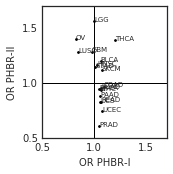

In [56]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
#plt.figure(figsize=(3, 3))
plt.scatter(both[both.predicted == 'x'].OR,
            both[both.predicted == 'z'].OR, c='k', s=3)
for i, txt in enumerate(both[both.predicted == 'x'].tissues):
    ax.annotate(txt, (list(both[both.predicted == 'x'].OR)[i], 
                      list(both[both.predicted == 'z'].OR)[i]), size=7)
plt.xlabel('OR PHBR-I')
plt.ylabel('OR PHBR-II')
plt.axhline(1, c='k')
plt.axvline(1, c='k')
plt.locator_params(nbins=6)
plt.xlim(0.5,1.7)
plt.ylim(0.5,1.7)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/class_comparison/OR.class_comparison.tissue.conservative.pdf')

In [2]:
patient_tissues = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.conservative.csv',
                             index_col=0)

In [4]:
patient_tissues.Tissue.value_counts()

LGG     431
LUAD    413
HNSC    404
PRAD    395
THCA    384
SKCM    365
STAD    338
BLCA    333
LUSC    331
LIHC    301
GBM     294
COAD    262
KIRP    229
KIRC    201
BRCA    170
OV      153
PAAD    148
PCPG    144
TGCT    118
READ     76
MESO     73
ACC      72
UCEC     67
UVM      61
KICH     55
UCS      52
CESC     37
DLBC     35
Name: Tissue, dtype: int64